In [3]:
#%%
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch
import matplotlib.pyplot as plt
# from sktime.datasets import load_from_arff_to_dataframe
from torch import Tensor
import os, os.path
import urllib.response
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from torch.utils.data import TensorDataset
import pandas as pd
from tqdm import tqdm
import torchvision
import torchvision.transforms as transforms
# from torchaudio.datasets import SPEECHCOMMANDS
import os
import urllib.request
import tarfile
import shutil
# import librosa
import torch.utils.data as data
from scipy import integrate
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

class MultiSinusoidalDataset(Dataset):
    def __init__(self, num_samples, seq_length=100, num_features=100, freq_min=10, freq_max=500, num_classes=100):
        self.num_samples = num_samples
        self.seq_length = seq_length
        self.num_features = num_features
        self.freq_min = freq_min
        self.freq_max = freq_max
        self.num_classes = num_classes
        
    def __len__(self):
        return self.num_samples
    
    def __getitem__(self, idx):
        # Generate sinusoidal signals with noise and trend
        frequencies = [i for i in range(self.freq_min, self.freq_max+1, (self.freq_max-self.freq_min)//self.num_classes)]
        freq = frequencies[idx % self.num_classes]
        t = np.linspace(0, 1, self.seq_length)
        x = np.linspace(0, 1, self.num_features)
        freq_t = 0.5 * np.sin(2 * np.pi * 4 * t + np.random.uniform(0, 2*np.pi)) + freq
        signal_t = 0.5 * np.sin(2 * np.pi * freq * t + np.random.uniform(0, 2*np.pi)) 
        # Generate signal with the given freq and add noise to the signal
        signal = np.zeros((self.seq_length, self.num_features))
        for i in range(self.seq_length):
            signal[i, :] = 0.2 * np.sin(2 * np.pi * 4 * x + np.random.uniform(0, 2*np.pi)) + signal_t[i]
        # Add a non-linearly increasing or decreasing trend
        trend = np.linspace(-0.5, 0.5, self.seq_length).reshape(-1, 1)
        if np.random.rand() < 0.5:
            trend = np.square(trend)
        else:
            trend = -np.square(trend)
        signal += trend
        # Add more complex patterns to the signal
        signal += (0.2 * np.sin(4 * np.pi * freq * t) + 0.1 * np.sin(8 * np.pi * freq * t)).reshape(-1, 1)
        # Add noise
        signal += 0.1 * np.random.randn(*signal.shape)
        label = frequencies.index(freq)
        sample = {'input': torch.tensor(signal, dtype=torch.float).view(-1, self.num_features), 'label': label}
        return sample
    
    
# Hyperparameters for the dataset and dataloader
num_samples = 1000
seq_length = 200
seq_length_orig = seq_length
num_features = 100

freq_min=1
freq_max= 11
num_classes=10


batch_size = 64
eval_batch_size = 32
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

dataset = MultiSinusoidalDataset(num_samples, seq_length, num_features, freq_min, freq_max, num_classes)
# data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# val_dataset = SinusoidalDataset(num_samples, seq_length, num_features, freq_min, freq_max, num_classes)  # 100 test samples
# val_loader = DataLoader(val_dataset, batch_size=eval_batch_size, shuffle=False)
# # Create test dataset and loader
# test_dataset = SinusoidalDataset(num_samples, seq_length, num_features, freq_min, freq_max, num_classes)  # 100 test samples
# test_loader = DataLoader(test_dataset, batch_size=eval_batch_size, shuffle=False)
    

    

In [12]:
dataset[3]

{'input': tensor([[-0.0486,  0.0857, -0.1298,  ...,  0.1850,  0.2427,  0.1024],
         [ 0.3202,  0.2851,  0.2494,  ...,  0.3562,  0.5587,  0.4364],
         [ 0.2239,  0.2229,  0.2291,  ...,  0.0768,  0.1733,  0.2768],
         ...,
         [-0.1283, -0.0647,  0.0356,  ..., -0.0747, -0.1107, -0.0640],
         [-0.2013, -0.0904,  0.0017,  ..., -0.1018, -0.1076, -0.0352],
         [ 0.3990,  0.3229,  0.3280,  ...,  0.3694,  0.2055,  0.4808]]),
 'label': 3}

In [16]:
surface = dataset[2]['input']
x, y = np.meshgrid(np.arange(surface.shape[0]), 
                   np.arange(surface.shape[1]),
                   indexing='ij')

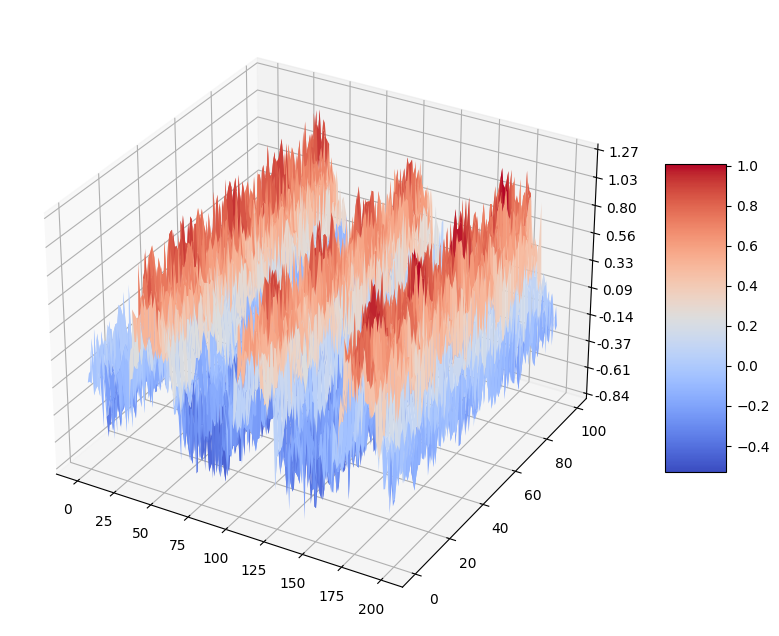

In [17]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x,y,surface, cmap=cm.coolwarm, linewidth=1)
# x, y = np.meshgrid(np.arange(surface.shape[0]), 
#                    np.arange(surface.shape[1]))
# surf = ax.plot_surface( x, y, surface.T, cmap=cm.coolwarm, linewidth=1)
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [1]:
%load_ext tensorboard

In [2]:
%tensorboard --logdir runs/Feb28_15-02-51_omi-rapid-02


In [3]:
from tensorboard import notebook
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs/fit (started 13:01:21 ago; port 6006, pid 235465).
